# **1. 선형 회귀 분석**
선형 회귀 분석(Linear Regression)은 주어진 데이터에서 입력 변수(독립 변수)와 출력 변수(종속 변수) 사이의 관계를 직선(또는 다차원에서는 평면)으로 설명하고, 새로운 입력 값에 대한 출력을 예측하는 통계 및 머신러닝 기법입니다. 예를 들어, 공부 시간(입력 변수)과 시험 점수(출력 변수) 사이의 관계를 분석해 "공부 시간이 늘어날수록 시험 점수가 증가한다"는 **패턴을 찾아냅니다.** 이 과정에서 선형 회귀는 "Y = W X + b"라는 수식(기울기 W와 절편 b)으로 데이터를 표현하며, 최적의 기울기와 절편을 찾기 위해 비용 함수(Cost Function)를 최소화하는 경사 하강법(Gradient Descent) 등의 알고리즘을 사용합니다. 최종적으로 선형 회귀 모델은 주어진 입력 값에 대해 가장 적합한 예측 결과를 제공합니다.

### Q. 파이토치를 이용한 선형회귀 분석과 그냥 선형회귀 분석의 차이가 뭘까?
“그냥 선형회귀”는 수학적 해법이나 scikit‑learn 같은 라이브러리로 간단·빠르게 결과를 얻는 데 집중하는 반면, PyTorch를 이용한 선형회귀는 학습 과정 전반을 프레임워크 위에서 직접 설계·제어하며, GPU 가속과 자동 미분의 이점을 누릴 수 있습니다. 프로젝트의 규모와 목표에 따라 적절한 방식을 선택하면 됩니다.  

### Q.  GPU 가속과 자동 미분의 이점?
- GPU 가속의 이점
    - 병렬 처리로 “한 번에 여러 계산”
    - 대용량 데이터·모델에서 진가 발휘
- 자동 미분(Autograd)의 이점
    - 계산 그래프를 따라 역전파(backward)만 호출하면, 프레임워크가 정확한 기울기(gradient)를 자동으로 계산
    - 오류를 크게 줄여 준다
    - 동적·복합 구조도 OK  
=> 모델 구조를 자주 바꾸거나, 복잡한 비선형·조건부 로직을 다룰 때 생산성을 폭발적으로 올려 줍니다

# 2. 단항 선형 회귀
단항 선형 회귀(Simple Linear Regression)는 하나의 독립 변수(입력 변수, X)를 사용하여 하나의 종속 변수(출력 변수, Y)를 예측하는 통계 및 머신러닝 기법입니다. 입력 변수와 출력 변수 사이의 관계를 직선(Linear Line)으로 나타내며, 데이터의 패턴을 기반으로 가장 잘 맞는 직선을 찾아내어 새로운 입력 값에 대한 출력을 예측합니다.

In [13]:
import torch # 파이토치 문법 사용 모듈
import torch.nn as nn # 파이토치를 이용해서 모델(알고리즘)을 만들 수 있도록 기초작업을 도와주는 모듈
import torch.optim as optim # 경사하강법 알고리즘 사용 모듈 (최적화 알고리즘)
import matplotlib.pyplot as plt # 시각화

torch.manual_seed(2025) # 어떤 수를 쓰더라도 관계 없음, 재현성

x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
print(x_train, x_train.shape) # 벡터들을 감싸고 있는 행렬
print(y_train, y_train.shape)

tensor([[1.],
        [2.],
        [3.]]) torch.Size([3, 1])
tensor([[2.],
        [4.],
        [6.]]) torch.Size([3, 1])


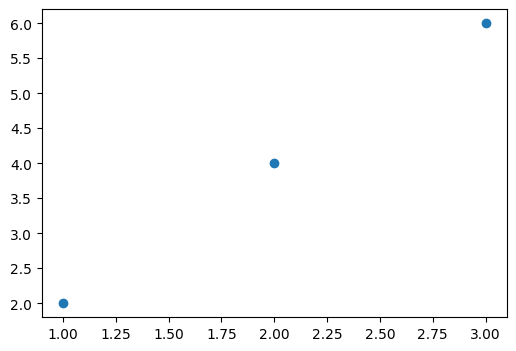

In [14]:
plt.figure(figsize=(6, 4))
plt.scatter(x_train, y_train)

In [15]:
# 직선을 그으려고 하면, 아래와 같이 가설을 줄 수 있다.
# y = wx + b # -1 ~ 1 범위 내에서 무작위로 선택

# 변수 하나를 주고, nn.Linear()를 쓰면 직선을 그어줄 수 있다.
model = nn.Linear(1, 1) # 입력 특성의 수, 출력 특성의 수 = 하나를 집어 넣어서 한 개를 나오게 할 거야!
print(model) # Linear(in_features=1, out_features=1, bias=True)


Linear(in_features=1, out_features=1, bias=True)


In [16]:
y_pred = model(x_train) # x_train을 넣어서 y_pred를 예측해볼거야!
print(y_pred) #train이 3개였기 때문에 결과가 3개 나올 것
#  y = wx + b에서 w와 b를 랜덤하게 관리해서 찍어줌

tensor([[1.2410],
        [1.6109],
        [1.9809]], grad_fn=<AddmmBackward0>)


In [17]:
print(list(model.parameters()))
# requires_grad=True -> 기울이가 미분에 의해서 계속 바뀔 것이다.
# tensor([[0.0634]] 얘가 w이고 , requires_grad=True), Parameter containing:
# tensor([0.6625],  얘가 b이다. requires_grad=True)]

[Parameter containing:
tensor([[0.3699]], requires_grad=True), Parameter containing:
tensor([0.8711], requires_grad=True)]


In [19]:
#  y = wx + b
print (0.3699*1 + 0.8711)
print (0.3699*2 + 0.8711)
print (0.3699*3 + 0.8711)

1.241
1.6109
1.9808000000000001


### 손실 함수

손실 함수(Loss Function)는 머신러닝과 딥러닝 모델이 예측한 값과 실제 값 사이의 차이를 수치적으로 나타내는 함수입니다. 모델이 학습을 통해 최적의 결과를 도출하려면 이 차이를 최소화해야 합니다. 손실 함수는 예측값과 실제값의 오차를 계산하여 하나의 숫자(스칼라 값)로 반환하며, 이 값은 비용(Cost) 또는 오차(Error)라고도 불립니다. 예를 들어, 회귀 문제에서는 주로 평균 제곱 오차(MSE, Mean Squared Error)를 사용하여 예측값과 실제값 간의 평균적인 차이를 측정하고, 분류 문제에서는 교차 엔트로피 손실(Cross-Entropy Loss)을 사용해 예측 확률 분포와 실제 레이블 분포 간의 차이를 계산합니다. 손실 함수가 반환한 값은 역전파(Backpropagation)를 통해 모델의 가중치와 편향을 조정하는 데 사용됩니다. 즉, 손실 함수는 모델이 학습 과정에서 목표로 삼아야 할 방향을 알려주는 나침반 역할을 합니다.

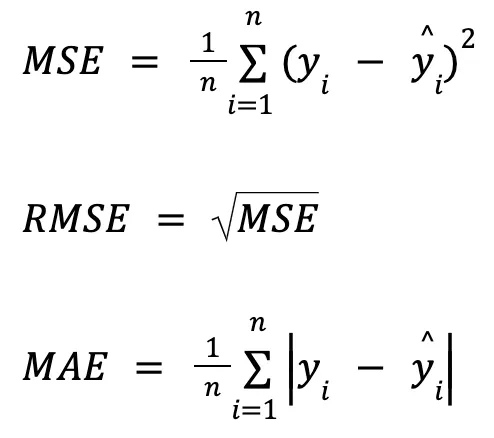

In [20]:
#  MSE를 수식으로 직접 쓰면? (예측값 - 실제값) **2 의 평균
((y_pred - y_train)**2).mean()

tensor(7.4790, grad_fn=<MeanBackward0>)

In [21]:
# 파이토치 적!극! 활용해보기!
loss = nn.MSELoss()(y_pred, y_train)
loss

tensor(7.4790, grad_fn=<MseLossBackward0>)

###최적화

최적화(Optimization)는 주어진 목표를 달성하기 위해 최상의 해결책(Optimal Solution)을 찾아가는 과정입니다. 머신러닝과 딥러닝에서는 주로 모델이 예측한 값과 실제 값 사이의 오차(손실 함수 값)를 최소화하는 것을 목표로 합니다. 이 과정에서 모델의 학습 가능한 파라미터(가중치와 편향)를 조정하여 손실 함수의 값을 점점 더 작게 만들어갑니다. 최적화는 주로 경사 하강법(Gradient Descent)과 같은 알고리즘을 사용해 수행되며, 손실 함수의 기울기(Gradient)를 따라가며 최저점(또는 최적점)을 찾습니다. 이 과정은 마치 산에서 가장 낮은 지점을 찾아 내려가는 것과 비슷합니다. 최적화는 단순히 손실을 줄이는 것뿐만 아니라, 학습 속도, 안정성, 과적합 방지와 같은 다양한 요소를 고려해야 하는 복합적인 과정입니다. 즉, 최적화는 모델이 데이터로부터 가장 정확하고 효율적인 예측을 할 수 있도록 파라미터를 조정하는 핵심 과정입니다.

### 경사하강법

경사하강법(Gradient Descent)은 머신러닝과 딥러닝 모델이 최적의 가중치(Weights)와 편향(Biases)를 찾기 위해 손실 함수(Loss Function)를 최소화하는 방법입니다. 이 알고리즘은 마치 산 꼭대기에서 출발해 가장 낮은 지점(최솟값)을 찾아 내려가는 과정과 비슷합니다. 먼저, 모델은 손실 함수의 기울기(Gradient)를 계산합니다. 이 기울기는 현재 지점에서 손실이 가장 빠르게 감소하는 방향을 나타냅니다. 이후, 모델은 기울기의 반대 방향으로 가중치와 편향 값을 조금씩 업데이트합니다. 이때 학습률(Learning Rate)은 한 번에 이동하는 "걸음의 크기"를 결정합니다. 학습률이 너무 크면 최적의 지점을 지나칠 수 있고, 너무 작으면 학습 속도가 매우 느려질 수 있습니다. 이 과정을 반복하면서 손실 함수 값이 점점 작아지고, 결국 최적의 가중치와 편향을 찾아내게 됩니다. 즉, 경사하강법은 모델이 더 나은 예측을 할 수 있도록 가중치를 조정해주는 핵심 최적화 알고리즘입니다.

경사하강법은 데이터를 어떻게 나눠서 학습하느냐에 따라 배치(Batch), 확률적(Stochastic), 미니배치(Mini-Batch)로 나뉩니다.

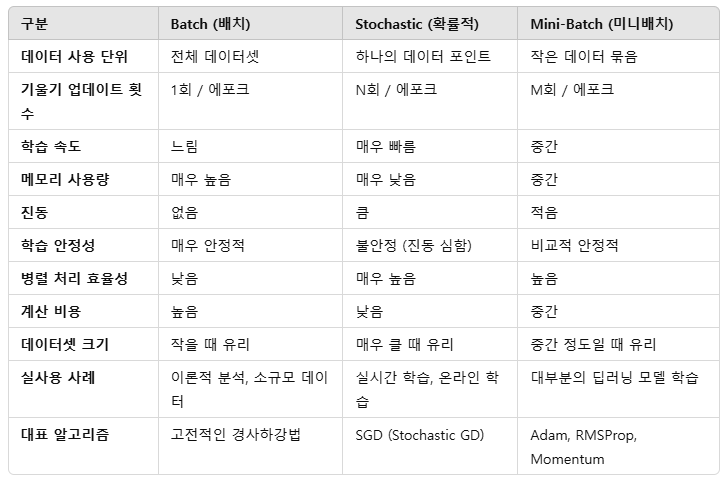

### 학습률

학습률(Learning Rate)은 머신러닝과 딥러닝 모델이 학습할 때 가중치(Weights)와 편향(Biases)를 얼마나 크게 조정할지를 결정하는 하이퍼파라미터입니다. 경사하강법(Gradient Descent)과 같은 최적화 알고리즘에서 손실 함수(Loss Function)의 기울기(Gradient)를 따라 최적의 가중치를 찾아갈 때, 학습률은 한 번의 업데이트에서 이동하는 "걸음의 크기"를 의미합니다. 학습률이 너무 크면 최적의 가중치를 지나쳐 버리거나 학습이 불안정해질 수 있고, 너무 작으면 학습 속도가 매우 느려져 최적값에 도달하기 어려울 수 있습니다. 따라서 적절한 학습률을 선택하는 것은 모델의 학습 속도와 최적화 성능을 결정하는 중요한 요소입니다. 일반적으로 고정된 학습률을 사용하기도 하지만, 상황에 따라 학습률을 점진적으로 줄이거나 동적으로 조정하는 방법(예: Adam, Step Decay, Cyclical Learning Rate 등)이 사용되기도 합니다.


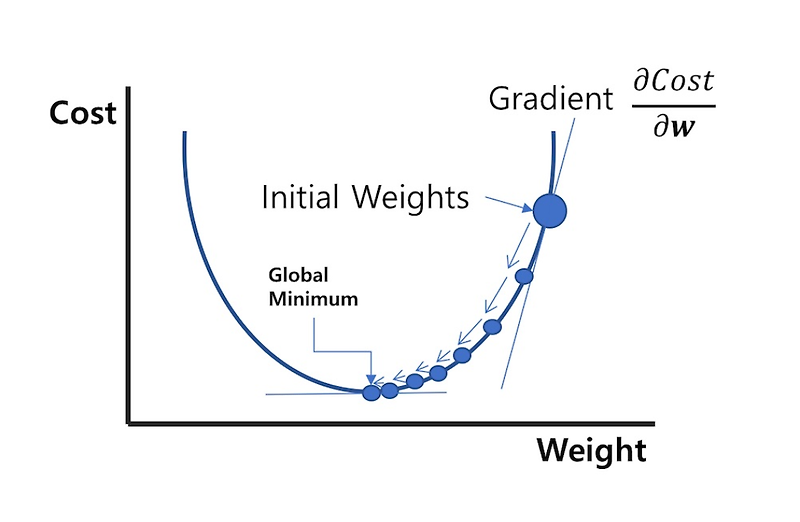

### 가중치 업데이트

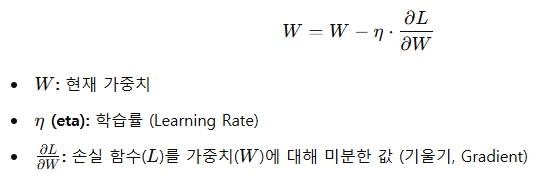


### 편향(Bias) 업데이트
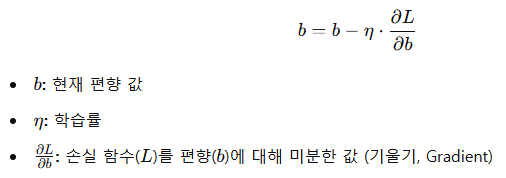

### 가중치 업데이트의 예
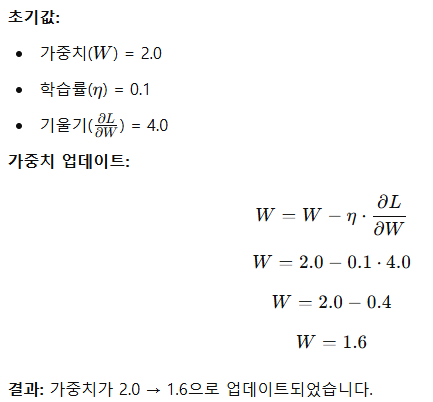

In [22]:
optimizer = optim.SGD(model.parameters(), lr=0.01)
# weight와 bias 정보를 SGD에 넣어주는 것 (초기값을 세팅해주기)
# lr = 학습률

# ⭐ 공식처럼 쓰일 파이토치의 문법 3줄!!! ⭐

# gradient를 초기화 : 학습을 하면서 연산식을 가지고 있을 필요가 없기 때문에 초기화
optimizer.zero_grad()
# 역전파: 비용 함수를 미분하여 gradient(기울기) 계산
loss.backward()
# W와 b를 업데이트
optimizer.step()

print(list(model.parameters())) # W: 0.2177, b: 0.7267

# 여기까지 딱 한 번 수정한 것!

[Parameter containing:
tensor([[0.4872]], requires_grad=True), Parameter containing:
tensor([0.9188], requires_grad=True)]


In [27]:
'''
[Parameter containing:
tensor([[0.3699]], requires_grad=True), Parameter containing:
tensor([0.8711], requires_grad=True)]

[Parameter containing:
tensor([[0.4872]], requires_grad=True), Parameter containing:
tensor([0.9188], requires_grad=True)]

=> 가중치와 편향이 바뀌었다 (한 번 학습됨!)
=> 반복 학습을 통해 오차가 있는 w, b를 수정하면서 오차를 계속 줄여나가야 함

'''
# epochs: 반복 학습 횟수(에포크)
epochs = 1000

for epoch in range(epochs + 1): # 0부터 epochs까지, 총 epochs+1번 반복하며 학습을 진행
    y_pred = model(x_train) # 현재 모델(model)에 학습용 입력(x_train)을 넣어 예측값(y_pred)을 만듭니다.
    loss = nn.MSELoss()(y_pred, y_train) # 예측값과 실제값(y_train) 간의 평균제곱오차(MSE)를 계산해 손실(loss)을 구함
    optimizer.zero_grad() # 이전 반복에서 쌓인 기울기(gradient)를 0으로 초기화
    loss.backward() # 손실을 바탕으로 모든 파라미터에 대한 기울기를 자동으로 계산합니다. (역전파 단계)
    optimizer.step() # 계산된 기울기를 사용해 모델 파라미터(weight, bias)를 한 걸음(learning rate 만큼) 업데이트

    if epoch % 100 == 0: # 학습 진행 중, 매 100번째 epoch마다
        print(f'Epoch: {epoch}/{epochs} Loss: {loss:.6f}')
        # 몇 번째 epoch인지와 현재 손실값을 소수점 6자리까지 화면에 보여주기

# --- 학습 완료 후 결과 확인 ---
print(list(model.parameters()))  # 학습이 끝난 모델의 파라미터(가중치와 편향)를 리스트 형태로 출력
'''
[Parameter containing:
tensor([[1.9475]], requires_grad=True), Parameter containing:
tensor([0.1193], requires_grad=True)]
y = 1.9475x + 0.1193
'''


# --- 모델 테스트 단계 ---
x_test = torch.FloatTensor([[5]])             # 테스트용 입력값 5를 텐서 형태로 넣기
y_pred = model(x_test)                        # 학습된 모델에 5를 넣고 예측값을 계산
print(y_pred)                                 # 예측된 결과를 화면에 출력 -> 예상과 같게 10에 가까운 값 출력


Epoch: 0/1000 Loss: 0.000000
Epoch: 100/1000 Loss: 0.000000
Epoch: 200/1000 Loss: 0.000000
Epoch: 300/1000 Loss: 0.000000
Epoch: 400/1000 Loss: 0.000000
Epoch: 500/1000 Loss: 0.000000
Epoch: 600/1000 Loss: 0.000000
Epoch: 700/1000 Loss: 0.000000
Epoch: 800/1000 Loss: 0.000000
Epoch: 900/1000 Loss: 0.000000
Epoch: 1000/1000 Loss: 0.000000
[Parameter containing:
tensor([[2.0000]], requires_grad=True), Parameter containing:
tensor([1.2717e-05], requires_grad=True)]
tensor([[10.0000]], grad_fn=<AddmmBackward0>)


# 3. 다중 선형 회귀
다중 선형 회귀(Multiple Linear Regression)는 여러 개의 독립 변수(입력 변수)를 사용해 하나의 종속 변수(출력 변수)를 예측하는 통계 및 머신러닝 기법입니다. 단순 선형 회귀가 하나의 독립 변수와 하나의 종속 변수 간의 선형 관계를 설명하는 반면, 다중 선형 회귀는 두 개 이상의 입력 변수가 출력 변수에 어떻게 영향을 미치는지를 분석합니다. 이 관계는 수식으로 표현되며, 예를 들어 Y=W1X1+W2X2+...+WnXn+b와 같이 나타납니다. 여기서 Y는 예측 값, X1,X2,...Xn ​은 입력 변수, W1,W2,...Wn ​은 각 변수의 가중치, b는 절편입니다. 다중 선형 회귀는 입력 변수들이 독립적이고, 종속 변수와 선형 관계를 가진다는 가정 하에 작동하며, 주로 경제학, 의료, 마케팅 등 다양한 분야에서 복합적인 요인의 영향을 분석하고 예측하는 데 사용됩니다.

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device를 객체로 만들어주는 것
print(f"device: {device}")

device: cpu


In [30]:
X_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70],
                             [85, 90, 88],
                             [78, 85, 82]]).to(device)

y_train = torch.FloatTensor([[152], [185], [180], [196], [142], [175], [155]]).to(device)

print(X_train, X_train.shape)
print(y_train, y_train.shape)

tensor([[ 73.,  80.,  75.],
        [ 93.,  88.,  93.],
        [ 89.,  91.,  90.],
        [ 96.,  98., 100.],
        [ 73.,  66.,  70.],
        [ 85.,  90.,  88.],
        [ 78.,  85.,  82.]]) torch.Size([7, 3])
tensor([[152.],
        [185.],
        [180.],
        [196.],
        [142.],
        [175.],
        [155.]]) torch.Size([7, 1])


In [31]:
# 학습을 시킬 때 모델 자체도 디바이스에 같이 있어야 한다. 데이터만 cpu나 gpu에 있다고 되는 게 아님!
model = nn.Linear(3, 1).to(device)
print(model)

Linear(in_features=3, out_features=1, bias=True)


In [32]:
# optimizer = optim.SGD(model.parameters(), lr=0.00001)
optimizer = optim.Adam(model.parameters(), lr=0.01)

#### Adam

Adam(Adaptive Moment Estimation)은 경사하강법(Gradient Descent)을 개선한 최적화 알고리즘으로, 머신러닝과 딥러닝 모델 학습에서 널리 사용됩니다. Adam은 SGD(Stochastic Gradient Descent)의 단점을 보완하기 위해 개발되었으며, 각 가중치(Weight)와 편향(Bias)마다 다른 학습률(Learning Rate)을 적용해 더욱 효율적이고 안정적으로 최적화를 수행합니다.

Adam은 다음 두 가지 아이디어를 결합한 최적화 알고리즘입니다.  

- Momentum	: 지금까지의 기울기를 누적해서 방향을 부드럽게 만듦 (관성처럼 움직이기)
- RMSProp	: 각 파라미터마다 학습률을 다르게 조절해서 더 효율적으로 학습

In [33]:
loss_fn = nn.MSELoss()

In [34]:
epochs = 1000

In [45]:
for epoch in range(epochs + 1):

    y_pred = model(X_train)

    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch: {epoch}/{epochs}, Loss: {loss.item():.6f}')

print("\n모델 파라미터:")
for param in model.parameters():
    print(param)

x_test = torch.FloatTensor([[93, 93, 93]]).to(device)
y_pred = model(x_test)
print(f"\n새로운 입력 데이터 {x_test.tolist()}의 예측 결과: {y_pred.item():.4f}")

Epoch: 0/1000, Loss: 5.571891
Epoch: 100/1000, Loss: 5.534816
Epoch: 200/1000, Loss: 5.496960
Epoch: 300/1000, Loss: 5.458321
Epoch: 400/1000, Loss: 5.418891
Epoch: 500/1000, Loss: 5.378629
Epoch: 600/1000, Loss: 5.337700
Epoch: 700/1000, Loss: 5.296020
Epoch: 800/1000, Loss: 5.253647
Epoch: 900/1000, Loss: 5.210640
Epoch: 1000/1000, Loss: 5.167015

모델 파라미터:
Parameter containing:
tensor([[1.4590, 0.4130, 0.1841]], requires_grad=True)
Parameter containing:
tensor([-4.0325], requires_grad=True)

새로운 입력 데이터 [[93.0, 93.0, 93.0]]의 예측 결과: 187.1788
